In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as s
%matplotlib inline

In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#load the claims data

sdata=pd.read_csv(r"/content/drive/MyDrive/Crop_production.csv")
sdata_bk=sdata.copy()
sdata.head()

,Unnamed: 0,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
0,0,andhra pradesh,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671
1,1,andhra pradesh,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030
2,2,andhra pradesh,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901
3,3,andhra pradesh,kharif,maize,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000
4,4,andhra pradesh,kharif,moong,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615


In [ ]:
sdata.shape

(99849, 13)

In [ ]:
del sdata['Unnamed: 0']

In [ ]:
sdata.columns

Index(['State_Name', 'Crop_Type', 'Crop', 'N', 'P', 'K', 'pH', 'rainfall',
       'temperature', 'Area_in_hectares', 'Production_in_tons',
       'Yield_ton_per_hec'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Convert the 'Gender' column to numerical data
sdata['State_Name'] = encoder.fit_transform(sdata['State_Name'])
sdata['Crop_Type'] = encoder.fit_transform(sdata['Crop_Type'])
sdata['Crop'] = encoder.fit_transform(sdata['Crop'])

# Print the encoded gender values
print(sdata.head())

   State_Name  Crop_Type  Crop    N   P   K    pH  rainfall  temperature  \
0           1          0    18  120  40  20  5.46    654.34    29.266667   
1           1          0    24   20  60  20  6.18    654.34    29.266667   
2           1          0    26   80  40  40  5.42    654.34    29.266667   
3           1          0    29   80  40  20  5.62    654.34    29.266667   
4           1          0    31   20  40  20  5.68    654.34    29.266667   

   Area_in_hectares  Production_in_tons  Yield_ton_per_hec  
0            7300.0              9400.0           1.287671  
1            3300.0              1000.0           0.303030  
2           10100.0             10200.0           1.009901  
3            2800.0              4900.0           1.750000  
4            1300.0               500.0           0.384615  


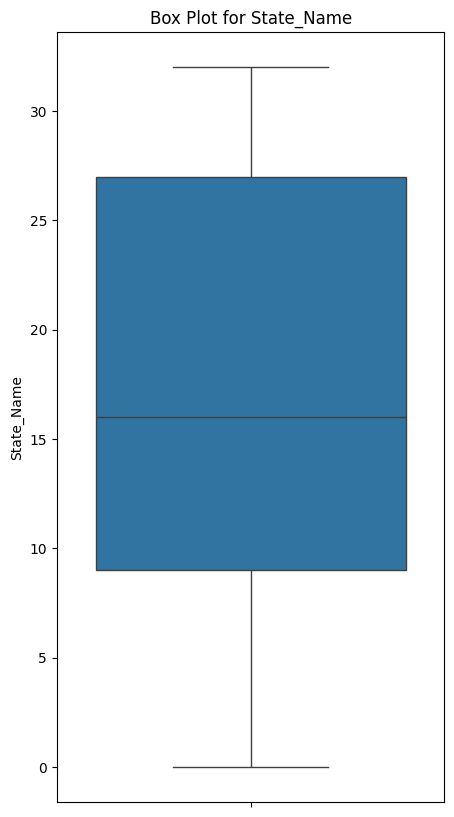

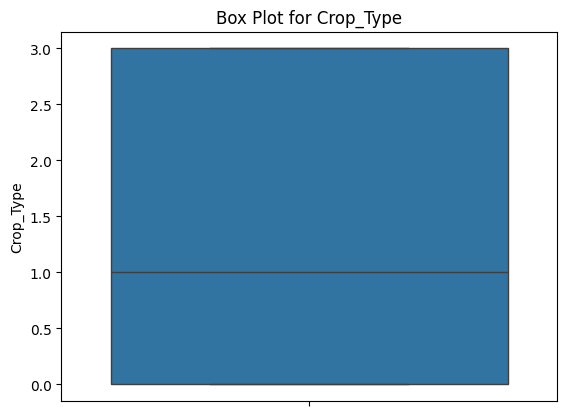

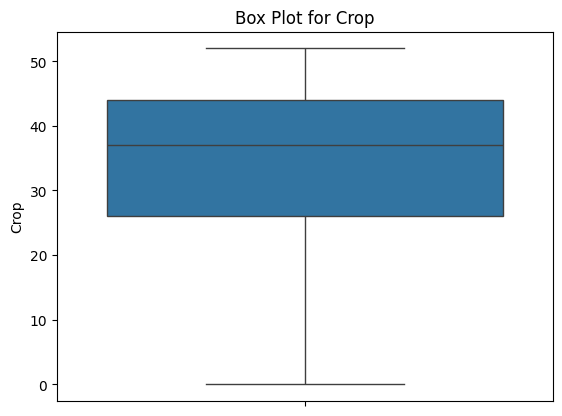

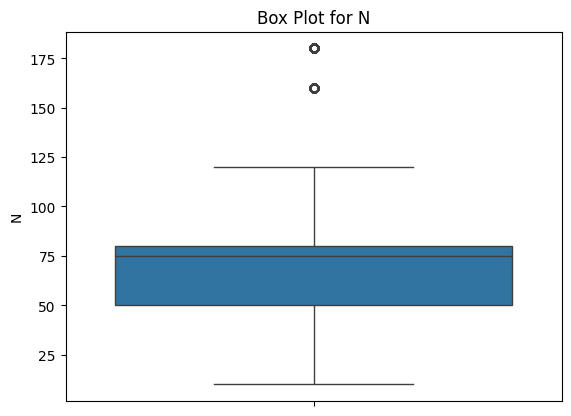

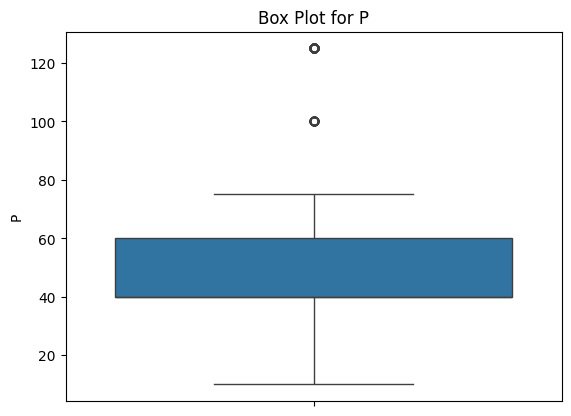

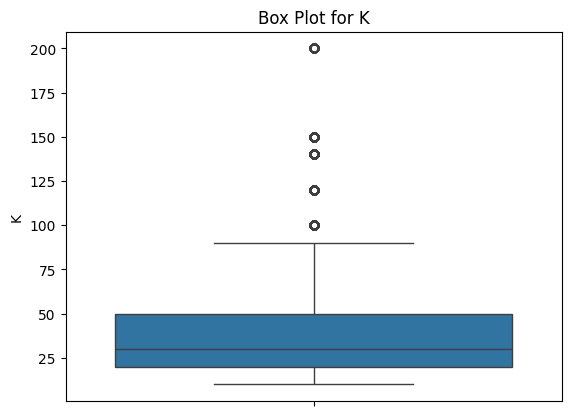

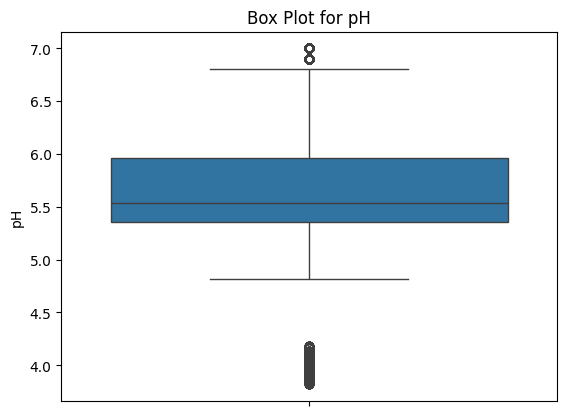

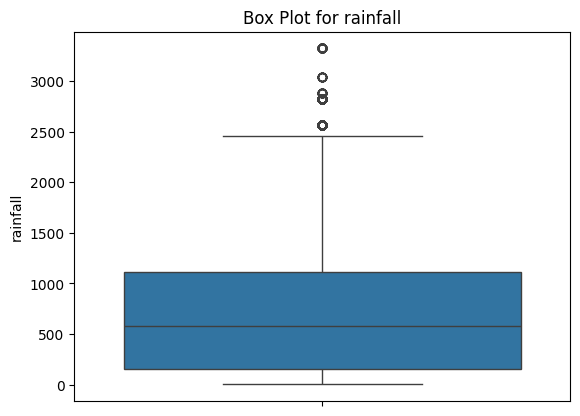

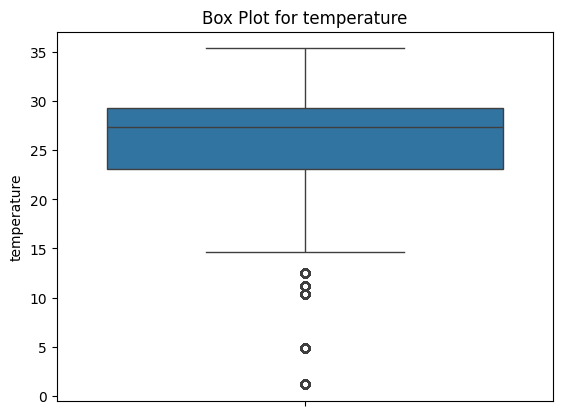

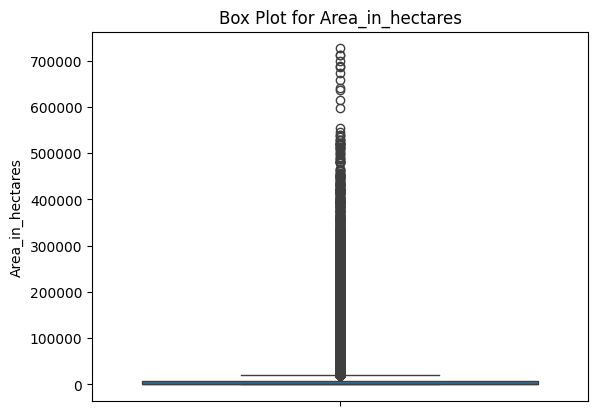

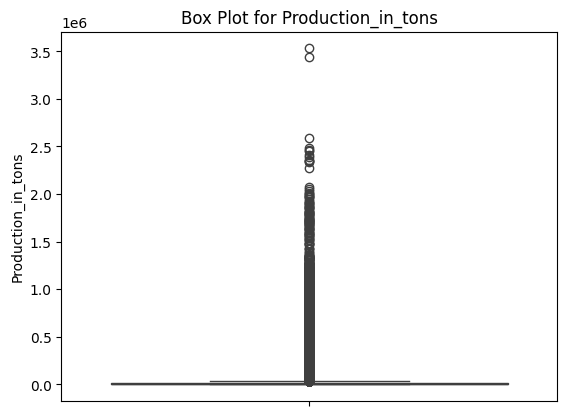

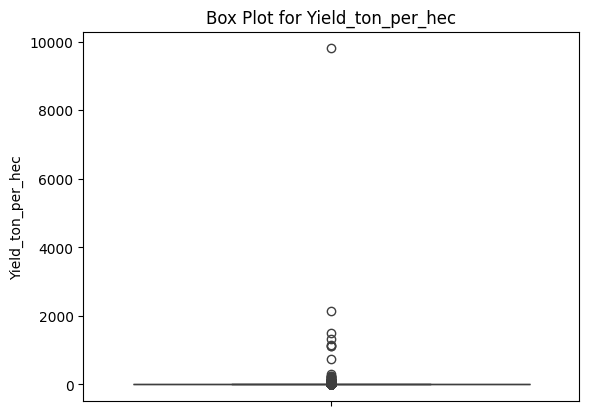

In [ ]:
#checking for outliers
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 10))  # Optional: Adjust the figure size

# You can use subplots to display multiple box plots in one figure
for column in sdata.columns:
    sns.boxplot(y=sdata[column])  # Use 'y' to specify the data on the y-axis
    plt.title(f'Box Plot for {column}')
    plt.show()


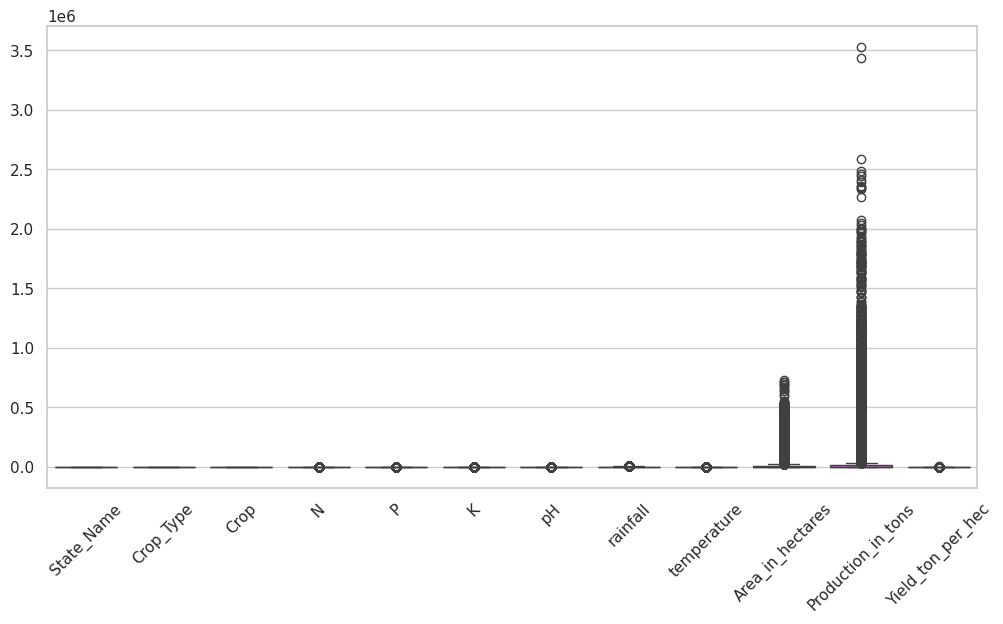

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Optional: Adjust the figure size

# Assuming sdata is your DataFrame
sns.boxplot(data=sdata)


# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

plt.show()


In [ ]:
import pandas as pd
from scipy.stats import zscore


# Set a z-score threshold for outliers
z_threshold = 2  # You can adjust this threshold based on your requirements

# Calculate z-scores for each column
z_scores = zscore(sdata)

# Identify outliers based on the z-score threshold
outliers = (abs(z_scores) > z_threshold).any(axis=1)

# Remove outliers from the DataFrame
sdata_no_outliers = sdata[~outliers]

# Display the result
print("Original DataFrame:")
print(sdata.shape)
print("\nDataFrame without outliers:")
print(sdata_no_outliers.shape)


Original DataFrame:
(99849, 12)

DataFrame without outliers:
(67544, 12)


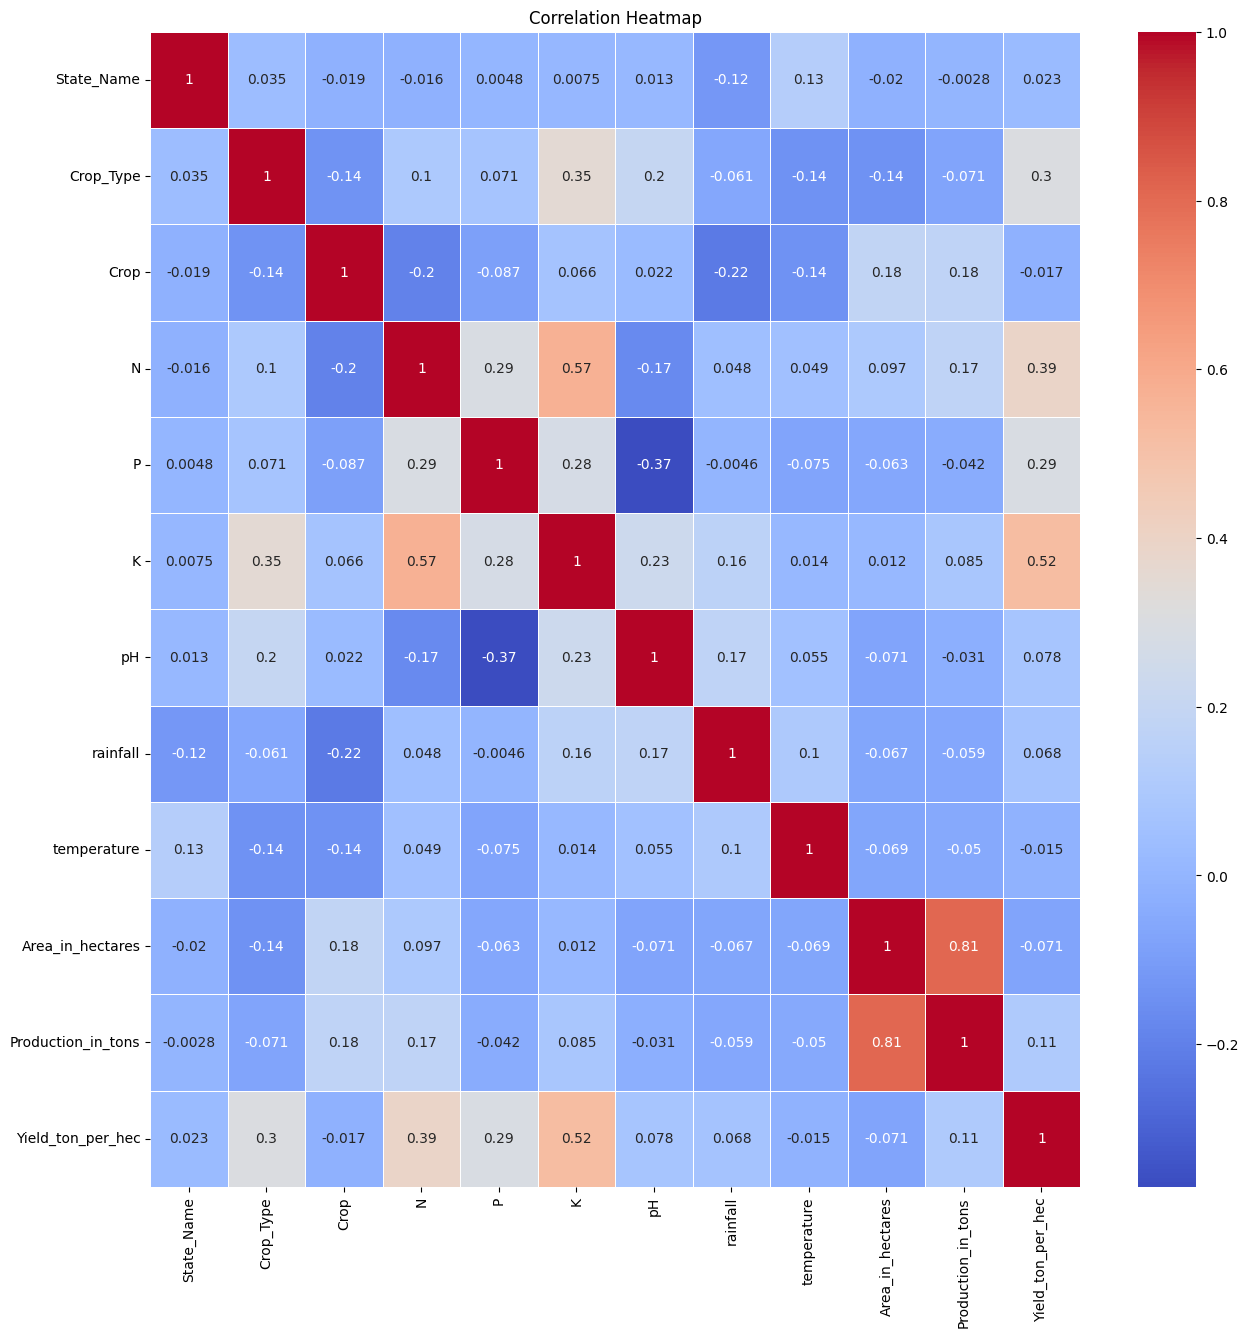

In [ ]:

import seaborn as sns

##to know the correlation betwwen independent and dependent variables
# Specify the target variable and independent variables
target_variable = 'Yield_ton_per_hec'  # Replace with the actual target variable name
independent_variables = ['State_Name','Crop_Type','Crop','N', 'P', 'K', 'pH','rainfall',
       'temperature', 'Area_in_hectares','Production_in_tons']  # Replace with the actual independent variable names

# Calculate the correlation matrix
correlation_matrix = sdata_no_outliers[independent_variables + [target_variable]].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

# Display the plot
plt.show()




In [ ]:
#feature selection
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd


# Creating a DataFrame using the provided data dictionary and column names
data = pd.DataFrame(sdata_no_outliers)

# Assuming 'sdata' contains the DataFrame with your actual data
X = data.drop(columns=['Yield_ton_per_hec'])  # Exclude the target variable ('Yield_ton_per_hec')
y = data['Yield_ton_per_hec']  # Selecting the target variable ('Yield_ton_per_hec')

# Select the top 5 features using F-test
k_best = SelectKBest(score_func=f_regression, k=11)
X_selected = k_best.fit_transform(X, y)

# Get the indices of the selected features and their names
selected_indices = k_best.get_support(indices=True)
selected_features = X.columns[selected_indices]

# Print the indices and names of selected features
print("Selected feature indices:", selected_indices)
print("Selected features:", selected_features)


Selected feature indices: [ 0  1  2  3  4  5  6  7  8  9 10]
Selected features: Index(['State_Name', 'Crop_Type', 'Crop', 'N', 'P', 'K', 'pH', 'rainfall',
       'temperature', 'Area_in_hectares', 'Production_in_tons'],
      dtype='object')


In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel

target_column = 'Yield_ton_per_hec'

# Define features (X) and target variable (y)
X = sdata_no_outliers.drop(columns=[target_column])
y = sdata_no_outliers[target_column]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of different models for feature selection
models = [
    ('LASSO', Lasso(alpha=0.1, random_state=42)),
    ('Ridge', Ridge(alpha=0.1, random_state=42)),
    ('ElasticNet', ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42))
]

# Perform feature selection with different models
for name, model in models:
    print(f"---- Feature selection with {name} ----")
    feature_selection = SelectFromModel(model)
    feature_selection.fit(X_train, y_train)

    # Get the selected features
    selected_features = feature_selection.get_support()

    # Print selected feature indices or names
    print("Selected features:")
    for index, selected in enumerate(selected_features):
        if selected:
            print(f"Feature {index + 1}")  # Adding 1 because indices usually start from 0

    print("\n")


---- Feature selection with LASSO ----
Selected features:
Feature 1
Feature 2
Feature 3
Feature 4
Feature 5
Feature 6
Feature 8
Feature 10
Feature 11


---- Feature selection with Ridge ----
Selected features:
Feature 2
Feature 7


---- Feature selection with ElasticNet ----
Selected features:
Feature 2
Feature 6


---- Feature selection with Random Forest ----
Selected features:
Feature 3
Feature 6
Feature 11


---- Feature selection with Decision Tree ----
Selected features:
Feature 1
Feature 3
Feature 6
Feature 11


---- Feature selection with Gradient Boosting ----
Selected features:
Feature 6
Feature 10
Feature 11




In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_squared_log_error

import numpy as np

# Define a function to calculate RMSLE
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(np.abs(y_true), np.abs(y_pred)))

# Define features (X) and target variable (y)
X = sdata_no_outliers.drop(columns=[target_column])
y = sdata_no_outliers[target_column]
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

target_column = 'Yield_ton_per_hec'  # Replace this with your target column

# List of different models for feature selection
models = [
    ('LASSO', Lasso(alpha=0.1, random_state=42)),
    ('Ridge', Ridge(alpha=0.1, random_state=42)),
    ('ElasticNet', ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42))
]

# Loop through models and evaluate their performance
for name, model in models:
    print(f"---- Evaluating {name} ----")
    feature_selection = SelectFromModel(model)
    feature_selection.fit(X_train, y_train)

    # Transform the training and test sets
    X_train_selected = feature_selection.transform(X_train)
    X_test_selected = feature_selection.transform(X_test)

    # Train the model on selected features
    model.fit(X_train_selected, y_train)

    # Make predictions
    y_pred = model.predict(X_test_selected)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    rmsle_score = rmsle(y_test, y_pred)

    # Print the metrics
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R-squared: {r2:.4f}")
    print(f"RMSLE: {rmsle_score:.4f}")
    print("\n")


---- Evaluating LASSO ----
MAE: 1.7489
MSE: 13.6539
RMSE: 3.6951
R-squared: 0.3690
RMSLE: 0.5684


---- Evaluating Ridge ----
MAE: 2.1465
MSE: 19.6253
RMSE: 4.4300
R-squared: 0.0930
RMSLE: 0.7219


---- Evaluating ElasticNet ----
MAE: 1.9529
MSE: 15.4629
RMSE: 3.9323
R-squared: 0.2854
RMSLE: 0.6841


---- Evaluating Random Forest ----
MAE: 1.0923
MSE: 8.6037
RMSE: 2.9332
R-squared: 0.6024
RMSLE: 0.3517


---- Evaluating Decision Tree ----
MAE: 0.7509
MSE: 4.3974
RMSE: 2.0970
R-squared: 0.7968
RMSLE: 0.2822


---- Evaluating Gradient Boosting ----
MAE: 0.5676
MSE: 1.8803
RMSE: 1.3712
R-squared: 0.9131
RMSLE: 0.2242




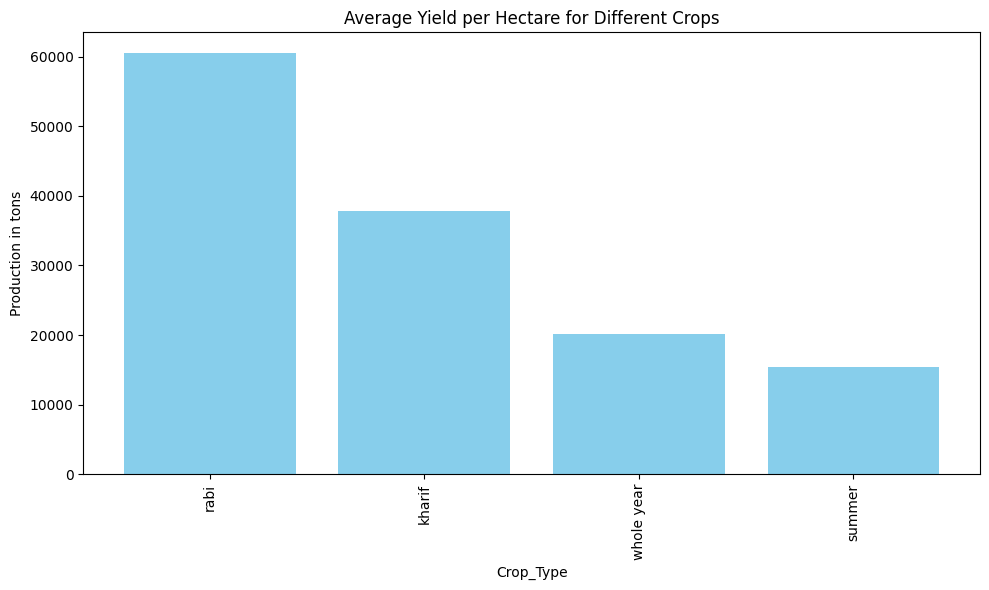

In [ ]:
#visualization
import matplotlib.pyplot as plt
import pandas as pd
# Grouping the data by 'Crop' and calculating mean yield for each crop
crop_yield = sdata_bk.groupby('Crop_Type')['Production_in_tons'].mean().reset_index()
# Sorting crops based on yield (optional)
crop_yield = crop_yield.sort_values('Production_in_tons', ascending=False)
# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(crop_yield['Crop_Type'], crop_yield['Production_in_tons'], color='skyblue')
plt.xlabel('Crop_Type')
plt.ylabel('Production in tons')
plt.title('Average Yield per Hectare for Different Crops')
plt.xticks(rotation=90)  # Rotate x-labels for better readability
plt.tight_layout()
plt.show()


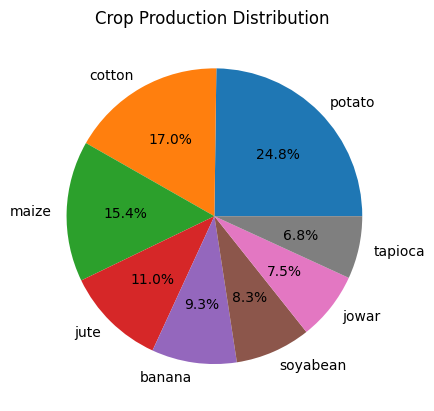

In [ ]:
new_df =  sdata_bk.groupby('Crop')['Production_in_tons'].sum().reset_index()
sorted_prod = new_df.sort_values(by='Production_in_tons', ascending=False)
sorted_prod

plot_pie = sorted_prod[2:10]
# plot_pie

crop_names = plot_pie['Crop']
production_values = plot_pie['Production_in_tons']

plt.pie(production_values, labels=crop_names, autopct='%1.1f%%')

plt.title('Crop Production Distribution ')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your dataset is stored in a variable called 'data'

# Assuming 'Crop_Type' and 'pH' columns exist in your dataset

# Calculate average pH for each Crop_Type
avg_ph_by_crop_type = sdata_bk.groupby('Crop_Type')['pH'].mean()

# Define light colors for the pie chart
light_colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink']

# Plotting pie chart with lighter colors
plt.figure(figsize=(5, 5))
plt.pie(avg_ph_by_crop_type, labels=avg_ph_by_crop_type.index, autopct='%1.1f%%', startangle=140, colors=light_colors)
plt.title('Average Soil pH by Crop Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


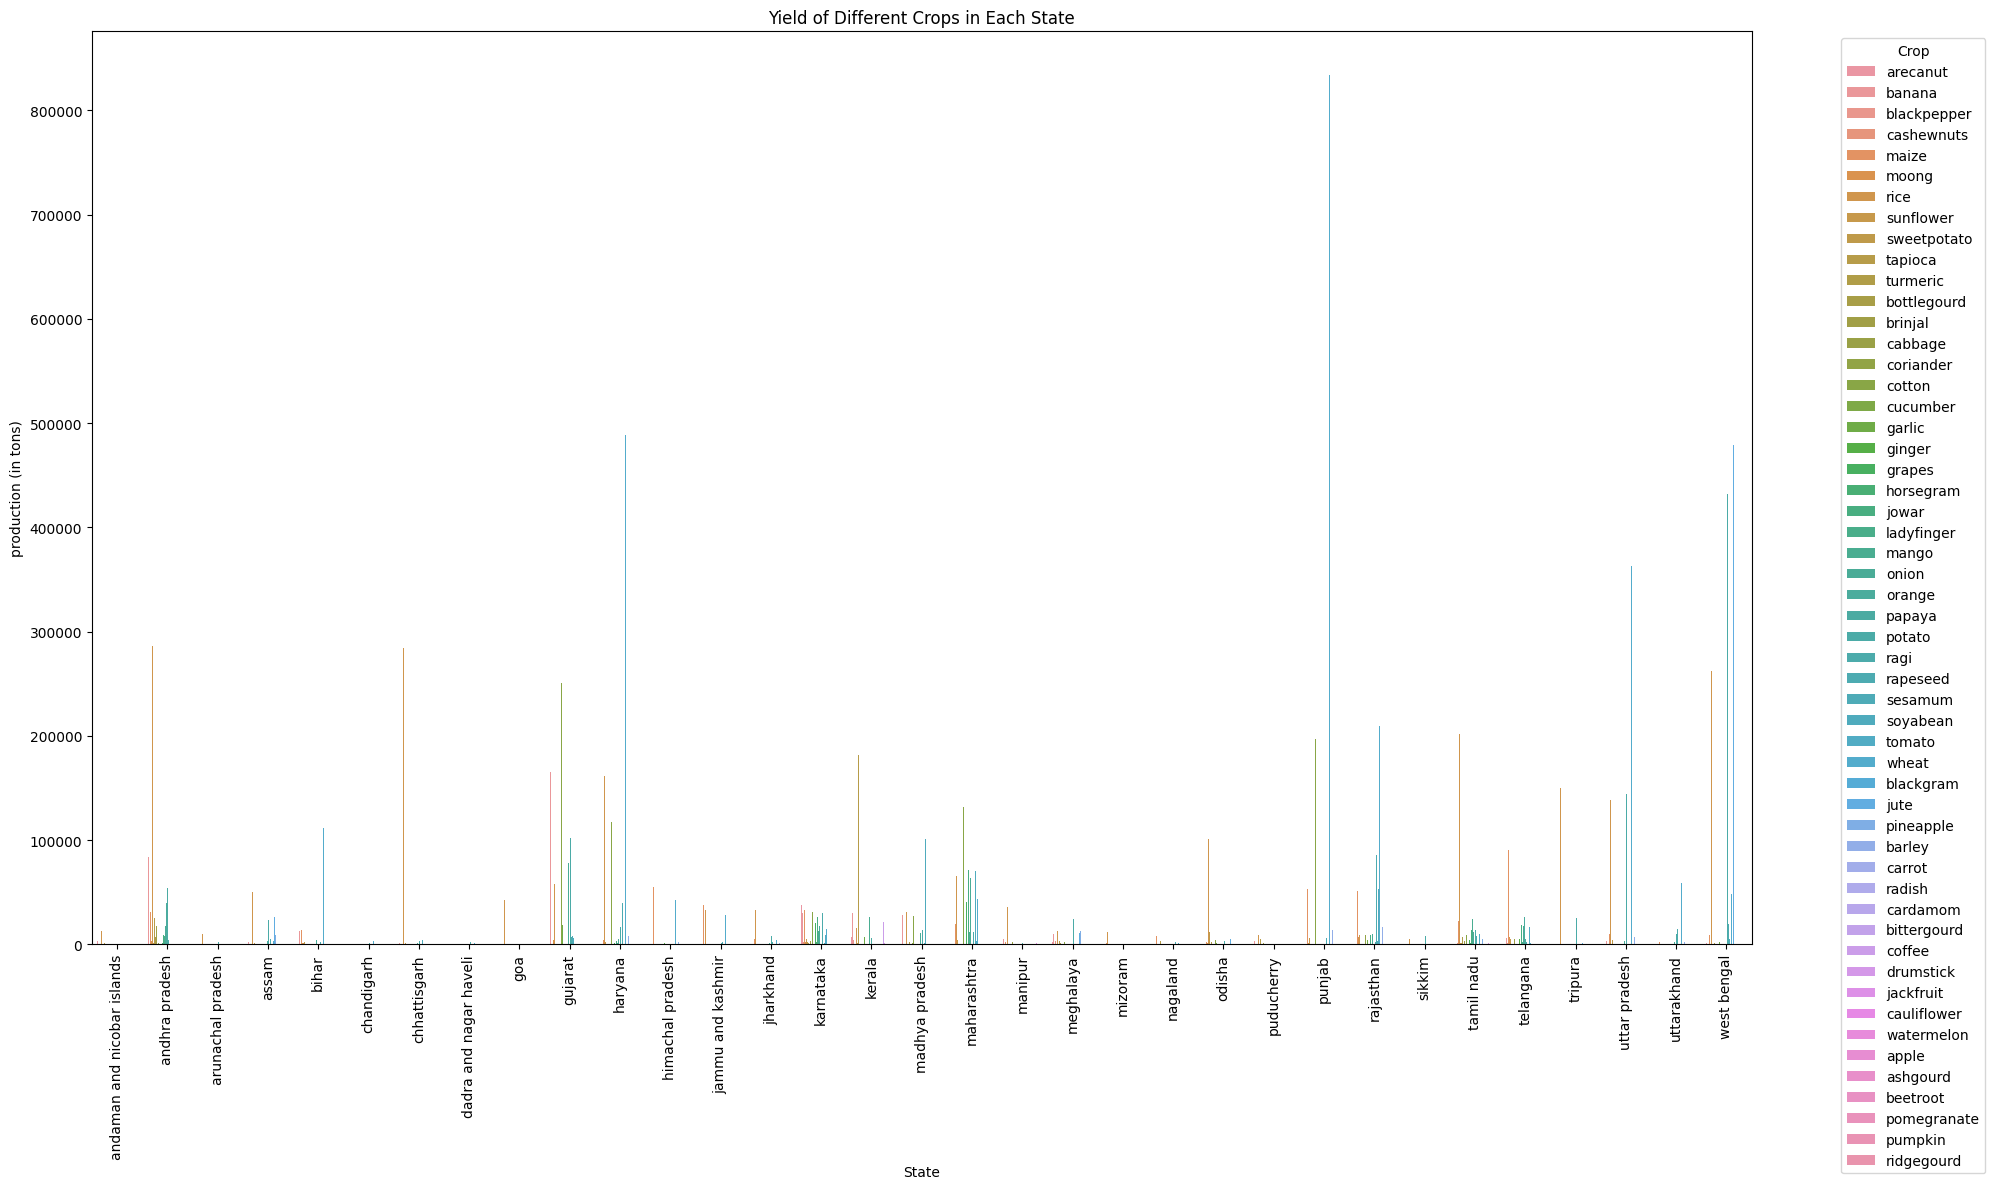

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Grouping the data by 'State_Name' and 'Crop' and calculating mean yield for each state-crop combination
state_crop_yield = sdata_bk.groupby(['State_Name', 'Crop'])['Production_in_tons'].mean().reset_index()

# Using Seaborn for better visualization
plt.figure(figsize=(20, 12))
sns.barplot(x='State_Name', y='Production_in_tons', hue='Crop', data=state_crop_yield)
plt.title('Yield of Different Crops in Each State')
plt.xlabel('State')
plt.ylabel('production (in tons)')
plt.xticks(rotation=90)
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:

indepvar=[]
for col in sdata_no_outliers.columns:
    if col!='Yield_ton_per_hec':
        indepvar.append(col)
tarvar='Yield_ton_per_hec'
x=sdata_no_outliers[indepvar]
y=sdata_no_outliers[tarvar]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=143)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((47280, 11), (20264, 11), (47280,), (20264,))

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

# Assuming x_train and x_test are DataFrames containing your features

# Fit and transform on training data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled, columns=x_train.columns)

# Only transform (using parameters from the training set) on test data
x_test_scaled = scaler.transform(x_test)
x_test = pd.DataFrame(x_test_scaled, columns=x_test.columns)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Create a list of different k values
k_values = [1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

for k in k_values:
    # Create a K-Nearest Neighbors (KNN) regression model
    model = KNeighborsRegressor(n_neighbors=k)

    # Fit the model to the training data
    model.fit(x_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(x_test)

    # Calculate additional regression metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Adjusted R-squared
    n = len(y_test)  # Number of data points
    p = x_test.shape[1]  # Number of predictors (independent variables)
    adjusted_r_squared = 1 - ((1 - r2) * (n - 1) / (n - p - 1))


    # Calculate Root Mean Squared Log Error (RMSLE)
    log_y_pred = np.log(np.clip(y_pred + 1, a_min=1e-10, a_max=None))
    log_y_test = np.log(np.clip(y_test + 1, a_min=1e-10, a_max=None))

    rmsle = np.sqrt(np.mean((log_y_pred - log_y_test)**2))


    # Print the results for each k value
    print(f"k = {k}")
    # Print the metrics
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R-squared (R2):", r2)
    print("Adjusted R-squared:", adjusted_r_squared)
    print("Root Mean Squared Log Error (RMSLE):", rmsle)
    print("\n")

k = 1
Mean Absolute Error (MAE): 0.5499097825425454
Mean Squared Error (MSE): 2.6458464096839758
Root Mean Squared Error (RMSE): 1.6266057941873857
R-squared (R2): 0.8661102744340052
Adjusted R-squared: 0.8660375513952325
Root Mean Squared Log Error (RMSLE): 0.2134111184147111


k = 2
Mean Absolute Error (MAE): 0.5192624777197452
Mean Squared Error (MSE): 2.270357069741983
Root Mean Squared Error (RMSE): 1.5067704104282056
R-squared (R2): 0.8851114396164524
Adjusted R-squared: 0.885049037178954
Root Mean Squared Log Error (RMSLE): 0.20145811258765234


k = 3
Mean Absolute Error (MAE): 0.5125637918402357
Mean Squared Error (MSE): 2.255642792103068
Root Mean Squared Error (RMSE): 1.501879752877396
R-squared (R2): 0.8858560371062256
Adjusted R-squared: 0.8857940391014937
Root Mean Squared Log Error (RMSLE): 0.20117622457593579


k = 4
Mean Absolute Error (MAE): 0.5100005228189336
Mean Squared Error (MSE): 2.205093832719724
Root Mean Squared Error (RMSE): 1.4849558352758254
R-squared (R2):

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor

# Assuming you have defined x_train, x_test, y_train, y_test and other necessary variables

# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6)

# Fit the model
model.fit(x_train, y_train, eval_set=(x_test, y_test), verbose=10)

# Make predictions
y_pred = model.predict(x_test)

# Calculate and print evaluation metrics
print('Mean Absolute Error (MAE):', round(mean_absolute_error(y_test, y_pred), 3))
print('Mean Squared Error (MSE):', round(mean_squared_error(y_test, y_pred), 3))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(mean_squared_error(y_test, y_pred)), 3))
print('R2_score:', round(r2_score(y_test, y_pred), 6))

# You can also calculate custom evaluation metrics like RMSLE
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    return np.sqrt(np.mean(np.square(np.log1p(y) - np.log1p(y_pred))))

rmsle_value = rmsle(y_test, y_pred)
print('Root Mean Squared Log Error (RMSLE):', round(rmsle_value, 3))


0:	learn: 4.2307363	test: 4.1481984	best: 4.1481984 (0)	total: 42.1ms	remaining: 4.17s
10:	learn: 2.6834734	test: 2.5974912	best: 2.5974912 (10)	total: 540ms	remaining: 4.37s
20:	learn: 2.1249921	test: 2.0644404	best: 2.0644404 (20)	total: 787ms	remaining: 2.96s
30:	learn: 1.8276637	test: 1.7741285	best: 1.7741285 (30)	total: 1.02s	remaining: 2.27s
40:	learn: 1.6046995	test: 1.5769381	best: 1.5769381 (40)	total: 1.43s	remaining: 2.06s
50:	learn: 1.4394177	test: 1.4156123	best: 1.4156123 (50)	total: 1.85s	remaining: 1.77s
60:	learn: 1.3124712	test: 1.3024338	best: 1.3024338 (60)	total: 2.06s	remaining: 1.31s
70:	learn: 1.2135292	test: 1.2074398	best: 1.2074398 (70)	total: 2.13s	remaining: 872ms
80:	learn: 1.1302100	test: 1.1268169	best: 1.1268169 (80)	total: 2.21s	remaining: 519ms
90:	learn: 1.0515543	test: 1.0589457	best: 1.0589457 (90)	total: 2.3s	remaining: 227ms
99:	learn: 0.9899306	test: 1.0034880	best: 1.0034880 (99)	total: 2.5s	remaining: 0us

bestTest = 1.003487994
bestIteration

<ipython-input-34-a29147a6dc05>:27: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean(np.square(np.log1p(y) - np.log1p(y_pred))))


In [ ]:
RGRResults1=pd.read_csv(r"/content/RGRResults1.csv")
print(RGRResults1)

Empty DataFrame
Columns: [Model Name, Mean_Absolute_Error_MAE, Adj_R_Square, Root_Mean_Squared_Error_RMSE, Mean_Squared_Error_MSE, Root_Mean_Squared_Log_Error_RMSLE, R2_score]
Index: []


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Ridge
from catboost import CatBoostRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor

# Assuming you have defined x_train, x_test, y_train, y_test and other necessary variables

# Custom RMSLE function
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    return np.sqrt(np.mean(np.square(np.log1p(y) - np.log1p(y_pred))))

# Your model definitions
ModelMLR = LinearRegression()
ModelDCR = DecisionTreeRegressor()
ModelRFR = RandomForestRegressor()
ModelETR = ExtraTreesRegressor()
ModelKNN = KNeighborsRegressor(n_neighbors=5)
ModelBRR = BayesianRidge()
ModelRidge = Ridge()
ModelLasso = Lasso()
ModelGBR = GradientBoostingRegressor()
ModelCatBoost =CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6)

MM = [ModelMLR, ModelDCR, ModelRFR, ModelETR, ModelKNN, ModelBRR, ModelRidge, ModelLasso, ModelGBR,ModelCatBoost]

for models in MM:
    models.fit(x_train, y_train)
    y_pred = models.predict(x_test)
    print('Model Name: ', models)
    from sklearn import metrics
    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred), 3))
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred), 3))
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred), 6))

    # Calculate RMSLE using custom function
    rmsle_value = rmsle(y_test, y_pred)
    print('Root Mean Squared Log Error (RMSLE):', round(rmsle_value, 3))

    def MAPE(y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')

    r_squared = round(metrics.r2_score(y_test, y_pred), 6)
    adjusted_r_squared = round(1 - (1 - r_squared) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1), 6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')

    new_row = {'Model Name': str(models),
               'Mean_Absolute_Error_MAE': metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square': adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Squared_Error_MSE': metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': rmsle_value,
               'R2_score': metrics.r2_score(y_test, y_pred)}
    RGRResults1 = RGRResults1.append(new_row, ignore_index=True)


Model Name:  LinearRegression()
Mean Absolute Error (MAE): 1.728
Mean Squared Error (MSE): 12.317
Root Mean Squared Error (RMSE): 3.51
R2_score: 0.376707
Root Mean Squared Log Error (RMSLE): 0.66
Mean Absolute Percentage Error (MAPE): inf %
Adj R Square:  0.376368
------------------------------------------------------------------------------------------------------------


<ipython-input-40-b4ed7993af00>:19: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean(np.square(np.log1p(y) - np.log1p(y_pred))))
<ipython-input-40-b4ed7993af00>:51: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
<ipython-input-40-b4ed7993af00>:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  RGRResults1 = RGRResults1.append(new_row, ignore_index=True)


Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 0.331
Mean Squared Error (MSE): 2.247
Root Mean Squared Error (RMSE): 1.499
R2_score: 0.886306
Root Mean Squared Log Error (RMSLE): 0.135
Mean Absolute Percentage Error (MAPE): nan %
Adj R Square:  0.886244
------------------------------------------------------------------------------------------------------------


<ipython-input-40-b4ed7993af00>:51: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
<ipython-input-40-b4ed7993af00>:51: RuntimeWarning: invalid value encountered in divide
  return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
<ipython-input-40-b4ed7993af00>:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  RGRResults1 = RGRResults1.append(new_row, ignore_index=True)


Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 0.223
Mean Squared Error (MSE): 0.703
Root Mean Squared Error (RMSE): 0.839
R2_score: 0.964414
Root Mean Squared Log Error (RMSLE): 0.097
Mean Absolute Percentage Error (MAPE): nan %
Adj R Square:  0.964395
------------------------------------------------------------------------------------------------------------


<ipython-input-40-b4ed7993af00>:51: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
<ipython-input-40-b4ed7993af00>:51: RuntimeWarning: invalid value encountered in divide
  return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
<ipython-input-40-b4ed7993af00>:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  RGRResults1 = RGRResults1.append(new_row, ignore_index=True)


Model Name:  ExtraTreesRegressor()
Mean Absolute Error (MAE): 0.235
Mean Squared Error (MSE): 0.655
Root Mean Squared Error (RMSE): 0.809
R2_score: 0.966865
Root Mean Squared Log Error (RMSLE): 0.112
Mean Absolute Percentage Error (MAPE): nan %
Adj R Square:  0.966847
------------------------------------------------------------------------------------------------------------


<ipython-input-40-b4ed7993af00>:51: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
<ipython-input-40-b4ed7993af00>:51: RuntimeWarning: invalid value encountered in divide
  return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
<ipython-input-40-b4ed7993af00>:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  RGRResults1 = RGRResults1.append(new_row, ignore_index=True)


Model Name:  KNeighborsRegressor()
Mean Absolute Error (MAE): 0.509
Mean Squared Error (MSE): 2.131
Root Mean Squared Error (RMSE): 1.46
R2_score: 0.892181
Root Mean Squared Log Error (RMSLE): 0.203
Mean Absolute Percentage Error (MAPE): nan %
Adj R Square:  0.892122
------------------------------------------------------------------------------------------------------------
Model Name:  BayesianRidge()
Mean Absolute Error (MAE): 1.728
Mean Squared Error (MSE): 12.317
Root Mean Squared Error (RMSE): 3.51
R2_score: 0.376698
Root Mean Squared Log Error (RMSLE): 0.665
Mean Absolute Percentage Error (MAPE): inf %
Adj R Square:  0.376359
------------------------------------------------------------------------------------------------------------
Model Name:  Ridge()
Mean Absolute Error (MAE): 1.728
Mean Squared Error (MSE): 12.317
Root Mean Squared Error (RMSE): 3.51
R2_score: 0.376707
Root Mean Squared Log Error (RMSLE): 0.66
Mean Absolute Percentage Error (MAPE): inf %
Adj R Square:  0.3763

<ipython-input-40-b4ed7993af00>:51: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
<ipython-input-40-b4ed7993af00>:51: RuntimeWarning: invalid value encountered in divide
  return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
<ipython-input-40-b4ed7993af00>:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  RGRResults1 = RGRResults1.append(new_row, ignore_index=True)
<ipython-input-40-b4ed7993af00>:19: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean(np.square(np.log1p(y) - np.log1p(y_pred))))
<ipython-input-40-b4ed7993af00>:51: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
<ipython-input-40-b4ed7993af00>:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Model Name:  GradientBoostingRegressor()
Mean Absolute Error (MAE): 0.585
Mean Squared Error (MSE): 1.589
Root Mean Squared Error (RMSE): 1.26
R2_score: 0.919598
Root Mean Squared Log Error (RMSLE): 0.248
Mean Absolute Percentage Error (MAPE): inf %
Adj R Square:  0.919554
------------------------------------------------------------------------------------------------------------
0:	learn: 4.2307363	total: 19.4ms	remaining: 1.92s
1:	learn: 3.9844828	total: 39.4ms	remaining: 1.93s
2:	learn: 3.7584538	total: 58.2ms	remaining: 1.88s
3:	learn: 3.5687054	total: 70.4ms	remaining: 1.69s
4:	learn: 3.3937671	total: 91.2ms	remaining: 1.73s


<ipython-input-40-b4ed7993af00>:19: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean(np.square(np.log1p(y) - np.log1p(y_pred))))
<ipython-input-40-b4ed7993af00>:51: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
<ipython-input-40-b4ed7993af00>:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  RGRResults1 = RGRResults1.append(new_row, ignore_index=True)


5:	learn: 3.2388875	total: 124ms	remaining: 1.94s
6:	learn: 3.0933888	total: 148ms	remaining: 1.96s
7:	learn: 2.9796936	total: 170ms	remaining: 1.95s
8:	learn: 2.8711439	total: 191ms	remaining: 1.93s
9:	learn: 2.7717790	total: 214ms	remaining: 1.93s
10:	learn: 2.6834734	total: 231ms	remaining: 1.87s
11:	learn: 2.5993540	total: 251ms	remaining: 1.84s
12:	learn: 2.5382318	total: 272ms	remaining: 1.82s
13:	learn: 2.4738620	total: 294ms	remaining: 1.8s
14:	learn: 2.4095995	total: 316ms	remaining: 1.79s
15:	learn: 2.3494529	total: 344ms	remaining: 1.8s
16:	learn: 2.2944542	total: 366ms	remaining: 1.78s
17:	learn: 2.2414101	total: 389ms	remaining: 1.77s
18:	learn: 2.1969176	total: 404ms	remaining: 1.72s
19:	learn: 2.1643005	total: 426ms	remaining: 1.7s
20:	learn: 2.1249921	total: 449ms	remaining: 1.69s
21:	learn: 2.0813739	total: 471ms	remaining: 1.67s
22:	learn: 2.0449633	total: 494ms	remaining: 1.66s
23:	learn: 2.0157692	total: 520ms	remaining: 1.65s
24:	learn: 1.9816848	total: 539ms	remai

<ipython-input-40-b4ed7993af00>:19: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean(np.square(np.log1p(y) - np.log1p(y_pred))))
<ipython-input-40-b4ed7993af00>:51: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
<ipython-input-40-b4ed7993af00>:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  RGRResults1 = RGRResults1.append(new_row, ignore_index=True)


In [ ]:
RGRResults1

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),1.727919,0.376368,3.509576,12.317126,0.660216,0.376707
1,DecisionTreeRegressor(),0.330984,0.886244,1.498920,2.246760,0.134714,0.886306
2,RandomForestRegressor(),0.223037,0.964395,0.838588,0.703230,0.097464,0.964414
3,ExtraTreesRegressor(),0.234885,0.966847,0.809198,0.654801,0.112118,0.966865
4,KNeighborsRegressor(),0.508880,0.892122,1.459677,2.130657,0.202901,0.892181
5,BayesianRidge(),1.727603,0.376359,3.509603,12.317312,0.664742,0.376698
6,Ridge(),1.727900,0.376368,3.509578,12.317137,0.659986,0.376707
7,Lasso(),1.861215,0.225793,3.910383,15.291097,0.627873,0.226213
8,GradientBoostingRegressor(),0.585425,0.919554,1.260495,1.588848,0.248393,0.919598
9,<catboost.core.CatBoostRegressor object at 0x7...,0.434169,0.949015,1.003488,1.006988,0.185104,0.949043


In [ ]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 3.7 MB/s eta 0:00:00


In [ ]:
#pedict the values with ET diagram
y_predF=ModelRFR.predict(x_test)

In [ ]:
#pedict the values with ET diagram
y_predF1=ModelETR.predict(x_test)

In [ ]:
Results=pd.DataFrame({'Yield_ton_per_hec_A':y_test,'Yield_ton_per_hec_P_F':y_predF})

ResultsFinal=sdata_no_outliers.merge(Results,left_index=True,right_index=True)

ResultsFinal.head(5)


,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec,Yield_ton_per_hec_A,Yield_ton_per_hec_P_F
3,1,0,29,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000,1.750000,2.538288
5,1,0,40,50,40,20,5.64,654.34,29.266667,6700.0,11800.0,1.761194,1.761194,1.732346
16,1,0,26,80,40,40,5.40,654.34,29.266667,2400.0,1500.0,0.625000,0.625000,0.781926
21,1,0,44,30,15,30,6.40,654.34,29.266667,400.0,100.0,0.250000,0.250000,0.213069
28,1,0,26,80,40,40,5.38,654.34,29.266667,1100.0,600.0,0.545455,0.545455,0.633645


In [ ]:
Results1=pd.DataFrame({'Yield_ton_per_hec_A':y_test,'Yield_ton_per_hec_P_F':y_predF1})

ResultsFinal1=sdata_no_outliers.merge(Results,left_index=True,right_index=True)

ResultsFinal1.head(5)


,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec,Yield_ton_per_hec_A,Yield_ton_per_hec_P_F
3,1,0,29,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000,1.750000,2.538288
5,1,0,40,50,40,20,5.64,654.34,29.266667,6700.0,11800.0,1.761194,1.761194,1.732346
16,1,0,26,80,40,40,5.40,654.34,29.266667,2400.0,1500.0,0.625000,0.625000,0.781926
21,1,0,44,30,15,30,6.40,654.34,29.266667,400.0,100.0,0.250000,0.250000,0.213069
28,1,0,26,80,40,40,5.38,654.34,29.266667,1100.0,600.0,0.545455,0.545455,0.633645


In [ ]:
ResultsFinal['%Error']=round(((ResultsFinal['Yield_ton_per_hec_A']-ResultsFinal['Yield_ton_per_hec_P_F'])/ResultsFinal['Yield_ton_per_hec_A'])*100,3)

In [ ]:
ResultsFinal1['%Error']=round(((ResultsFinal1['Yield_ton_per_hec_A']-ResultsFinal1['Yield_ton_per_hec_P_F'])/ResultsFinal1['Yield_ton_per_hec_A'])*100,3)

In [ ]:
ResultsFinal.sample(5)

,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec,Yield_ton_per_hec_A,Yield_ton_per_hec_P_F,%Error
95255,14,2,32,120,60,65,5.90,157.31,25.833333,15.0,160.0,10.666667,10.666667,8.260494,22.558
8377,22,0,42,80,40,40,5.52,1145.22,28.500000,15603.0,8873.0,0.568673,0.568673,0.613506,-7.884
24289,31,3,32,120,60,65,5.98,1411.78,19.945455,116.0,355.0,3.060345,3.060345,3.923860,-28.216
75819,25,0,42,80,40,40,5.54,510.05,33.373333,484.0,983.0,2.030992,2.030992,1.941492,4.407
32975,6,0,29,80,40,20,5.54,1151.02,28.033333,13785.0,21540.0,1.562568,1.562568,1.610810,-3.087


In [ ]:
ResultsFinal1.sample(5)

,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec,Yield_ton_per_hec_A,Yield_ton_per_hec_P_F,%Error
28023,16,0,44,30,15,30,6.44,1011.49,30.430000,1940.0,1048.0,0.540206,0.540206,0.537289,0.540
2525,22,1,24,20,60,20,5.96,167.38,23.560000,5955.0,1476.0,0.247859,0.247859,0.242116,2.317
39187,30,0,45,20,60,20,5.34,579.75,34.010000,3799.0,615.0,0.161885,0.161885,0.864143,-433.801
704,4,1,41,50,40,20,4.86,87.20,23.106000,1765.0,740.0,0.419263,0.419263,0.455927,-8.745
49952,4,2,29,80,40,20,5.40,98.98,34.923333,2504.0,8371.0,3.343051,3.343051,3.419069,-2.274


In [ ]:

from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np


# Create a Random Forest Regressor (Base Estimator)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Create Gradient Boosting Regressor with Random Forest as base estimator
gb_rf = GradientBoostingRegressor(init=rf, n_estimators=100, random_state=42)

# Fit the Gradient Boosting model
gb_rf.fit(x_train, y_train)

# Predict on the test set
predictions = gb_rf.predict(x_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate R-squared (R2 score)
r2 = r2_score(y_test, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Calculate Adjusted R-squared
n = len(y_test)
p = x_test.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Print the metrics
print(f"Gradient Boosting with Random Forest Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 score): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Adjusted R-squared: {adj_r2}")



Gradient Boosting with Random Forest Metrics:
Mean Squared Error (MSE): 0.624783955463989
R-squared (R2 score): 0.9683835947434675
Root Mean Squared Error (RMSE): 0.7904327646700818
Mean Absolute Error (MAE): 0.22044069997427687
Adjusted R-squared: 0.9683664220959353


In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Create a dataset for demonstration (Replace this with your actual data loading process)
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a base Random Forest Regressor
base_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Apply AdaBoost to the Random Forest
adaboost_rf = AdaBoostRegressor(base_estimator=base_rf, n_estimators=50, random_state=42)

# Fit the AdaBoost model
adaboost_rf.fit(x_train, y_train)

# Predict on the test set
predictions = adaboost_rf.predict(x_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)

# Print the metrics
print(f"AdaBoost with Random Forest Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 score): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost with Random Forest Metrics:
Mean Squared Error (MSE): 1676.3955620329243
R-squared (R2 score): 0.9006352467992037
Root Mean Squared Error (RMSE): 40.94380981336403
Mean Absolute Error (MAE): 31.45177317516287


In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from lightgbm import LGBMRegressor
import numpy as np

# Create a dataset for demonstration (Replace this with your actual data loading process)
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor (Base Estimator)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Create LGBMRegressor
lgbm = LGBMRegressor(n_estimators=50, random_state=42)

# Fit the LGBM model
lgbm.fit(x_train, y_train)

# Predict on the test set
predictions = lgbm.predict(x_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate R-squared (R2 score)
r2 = r2_score(y_test, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Calculate Adjusted R-squared
n = len(y_test)
p = x_test.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Print the metrics
print(f"LGBMRegressor Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 score): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Adjusted R-squared: {adj_r2}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000459 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] Start training from score -0.326169
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LGBMRegressor Metrics:
Mean Squared Error (MSE): 1296.24691

In [ ]:
# However, CatBoost natively operates as a boosting algorithm itself.
# If you want to apply boosting on a Random Forest using CatBoost, you can't directly
# incorporate CatBoost's boosting capabilities into another ensemble method like RandomForestRegressor.
# Instead, you can use CatBoost's boosting capabilities directly without the need for a RandomForest base estimator.

In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from catboost import CatBoostRegressor
import numpy as np

# Create a dataset for demonstration (Replace this with your actual data loading process)
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor (Base Estimator)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Create CatBoostRegressor
catboost = CatBoostRegressor(iterations=50, depth=6, learning_rate=0.1, random_state=42)

# Fit the CatBoost model
catboost.fit(x_train, y_train, eval_set=(x_test, y_test), verbose=10)

# Predict on the test set
predictions = catboost.predict(x_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate R-squared (R2 score)
r2 = r2_score(y_test, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Calculate Adjusted R-squared
n = len(y_test)
p = x_test.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Print the metrics
print(f"CatBoostRegressor Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 score): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Adjusted R-squared: {adj_r2}")


0:	learn: 125.3802639	test: 123.8520077	best: 123.8520077 (0)	total: 9.58ms	remaining: 470ms
10:	learn: 80.2357987	test: 81.3596773	best: 81.3596773 (10)	total: 85.2ms	remaining: 302ms
20:	learn: 56.9242762	test: 61.0738311	best: 61.0738311 (20)	total: 120ms	remaining: 166ms
30:	learn: 43.4721254	test: 50.1043416	best: 50.1043416 (30)	total: 154ms	remaining: 94.5ms
40:	learn: 34.3832135	test: 42.4070055	best: 42.4070055 (40)	total: 223ms	remaining: 49ms
49:	learn: 28.0352178	test: 36.3764610	best: 36.3764610 (49)	total: 256ms	remaining: 0us

bestTest = 36.37646096
bestIteration = 49

CatBoostRegressor Metrics:
Mean Squared Error (MSE): 1323.2469436340107
R-squared (R2 score): 0.9215673740996702
Root Mean Squared Error (RMSE): 36.37646139516612
Mean Absolute Error (MAE): 27.325753805740213
Adjusted R-squared: 0.9174174997134094


RANDOMFOREST_HYPERPARAMETERS

In [ ]:
#hyper parameter tuning onrandom forst regression
from sklearn.model_selection import RandomizedSearchCV  # Import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
import numpy as np


# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider at each split
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor()

# Perform Randomized Search with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                   n_iter=10, cv=5, scoring='r2', random_state=42)

# Fit the model with the data
random_search.fit(x_train, y_train)

# Get the best estimator from the search
best_rf = random_search.best_estimator_

# Make predictions
y_pred = best_rf.predict(x_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Adjusted R-squared
n = len(y_test)  # Number of data points
p = x_test.shape[1]  # Number of predictors (independent variables)
adjusted_r_squared = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Calculate Root Mean Squared Log Error (RMSLE)
log_y_pred = np.log(np.clip(y_pred + 1, a_min=1e-10, a_max=None))
log_y_test = np.log(np.clip(y_test + 1, a_min=1e-10, a_max=None))
rmsle = np.sqrt(np.mean((log_y_pred - log_y_test)**2))

# Print the metrics
print("Best hyperparameters:", random_search.best_params_)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Adjusted R-squared:", adjusted_r_squared)
print("R^2 Score:", r2)
print("Root Mean Squared Log Error (RMSLE):", rmsle)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None}
Mean Absolute Error (MAE): 0.22791576231537192
Mean Squared Error: 0.7378908039828905
Root Mean Squared Error (RMSE): 0.8590057066067085
Adjusted R-squared: 0.9626396836404818
R^2 Score: 0.9626599651131145
Root Mean Squared Log Error (RMSLE): 0.10140971801734323


In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Create a Random Forest Regressor (Base Estimator)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Create Gradient Boosting Regressor with Random Forest as base estimator
gb_rf = GradientBoostingRegressor(init=rf, n_estimators=100, random_state=42)

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gb_rf, param_distributions=param_grid,
                                   n_iter=10, scoring='neg_mean_squared_error', cv=5, random_state=42)

# Fit the model
random_search.fit(x_train, y_train)

# Get the best estimator from the search
best_gb_rf = random_search.best_estimator_

# Make predictions
predictions = best_gb_rf.predict(x_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)

# Calculate Adjusted R-squared
n = len(y_test)
p = x_test.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Print the metrics
print(f"Gradient Boosting with Random Forest Metrics after Hyperparameter Tuning:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 score): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Adjusted R-squared: {adj_r2}")


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

Gradient Boosting with Random Forest Metrics after Hyperparameter Tuning:
Mean Squared Error (MSE): 1269.46247044354
R-squared (R2 score): 0.9247553334486708
Root Mean Squared Error (RMSE): 35.62951684269014
Mean Absolute Error (MAE): 28.388383257049938
Adjusted R-squared: 0.9207741341602407


In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Create a Random Forest Regressor (Base Estimator)
rf = RandomForestRegressor(n_estimators=100, random_state=42, max_features=1.0)
#Setting it to 1.0 means that the algorithm considers all features for each split.
 # Set max_features explicitly

# Create Gradient Boosting Regressor with Random Forest as base estimator
gb_rf = GradientBoostingRegressor(init=rf, n_estimators=100, random_state=42)

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0],
    'max_features': [None, 'sqrt', 'log2']  # Update 'auto' to None or use specific values
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gb_rf, param_distributions=param_grid,
                                   n_iter=10, scoring='neg_mean_squared_error', cv=5, random_state=42)

# Fit the model
random_search.fit(x_train, y_train)

# Get the best estimator from the search
best_gb_rf = random_search.best_estimator_

# Make predictions
predictions = best_gb_rf.predict(x_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)

# Calculate Adjusted R-squared
n = len(y_test)
p = x_test.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Print the metrics
print(f"Gradient Boosting with Random Forest Metrics after Hyperparameter Tuning:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 score): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Adjusted R-squared: {adj_r2}")


Gradient Boosting with Random Forest Metrics after Hyperparameter Tuning:
Mean Squared Error (MSE): 0.5095314824244883
R-squared (R2 score): 0.9742158010006342
Root Mean Squared Error (RMSE): 0.7138147395679696
Mean Absolute Error (MAE): 0.19767444823809205
Adjusted R-squared: 0.9742017961522739
